## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Import Datasets

In [ ]:
df = pd.read_csv('dataset/train.tsv', delimiter='\t')
df.head()

## Exploratory Data Analysis (EDA)

### Data information

In [ ]:
df.info()

The dataset used consists of 902 entries.

### Missing data

In [ ]:
df.isnull().sum().sort_values(ascending=False)

There is no null data.

### More data insights

In [ ]:
number = df['LABEL'].value_counts().sort_values(ascending=False)
percent = df['LABEL'].value_counts().sort_values(ascending=False) / len(df) * 100

dataRating = pd.concat([number, percent], axis=1, keys=['Number of Rating','Percent'])
dataRating

Insights:
1. Most of the reviews are positive. 557 reviews (61.75 %) are 5 stars.
2. There are 198 reviews (about 22 %) of reviewws are under 3 stars.

In [ ]:
df['LENGTH'] = df['REVIEW'].apply(len)
df.head()

In [ ]:
df[df['LENGTH'] == df['LENGTH'].max()]

In [ ]:
df[df['LENGTH'] == df['LENGTH'].min()]

Insights:
1. The longest review sentences is 1222 characters long, which is very very long for a normal review.
2. The review is quite clean, there is no user bringing just punctuation (, or .) on a review sentence

## Text Cleaning

This text cleaning process includes:
- Upper case handling (so there is no difference in capital letters)
- look for root words in the Indonesian vocabulary (for example, 'membanggakan' == 'bannga' and 'kebanggan' == 'bangga')

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import string

In [ ]:
# Define the text processing funtion
def text_process(mess):
    # Handling lower/upper case
    nopunc = mess.lower()
    
    # Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed = stemmer.stem(nopunc)
    
    # Removing Stop Words
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    output = stopword.remove(stemmed)
    
    # Additional processing to remove specific words
    words_to_remove = ['ga', 'yang', 'yg', 'nya', 'layan', 'tempat', 'makan']
    output = ' '.join([word for word in output.split() if word not in words_to_remove])
    
    # Returns the cleaned text
    return output

In [ ]:
# Applying the function to the review text
df['PREPROCESS'] = df['REVIEW'].apply(text_process)
df.head()

In [ ]:
df['LENGTH_PRE'] = df['PREPROCESS'].apply(len)
df.head()

In [ ]:
df[df['LENGTH_PRE'] == df['LENGTH_PRE'].min()]

In [ ]:
df = df.replace('', np.NaN)
df.isnull().sum()

No null data even after the review data is preprocessed

In [ ]:
df.hist(column='LENGTH', by='LABEL', bins=100, figsize=(18,8))

There is no meaningful correlation between review data length and label.

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
import warnings
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
stopword = STOPWORDS

In [ ]:
def wordclouds(a,b):
    all_data = ''.join(a['PREPROCESS'])
    wordcloud = WordCloud(stopwords = stopword, background_color="white").generate(all_data)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(b)
    
plt.figure(figsize=(20,7))
plt.subplot(231)
one = df[df['LABEL'] == 1]
wordclouds(one,'Rating 1')

plt.subplot(232)
two = df[df['LABEL'] == 2]
wordclouds(two,'Rating 2')

plt.subplot(233)
three = df[df['LABEL'] == 3]
wordclouds(three,'Rating 3')

plt.subplot(234)
four = df[df['LABEL'] == 4]
wordclouds(four,'Rating 4')

plt.subplot(235)
five = df[df['LABEL'] == 5]
wordclouds(five,'Rating 5')

Common words found based on rating :
- Rating 1: layan, lama, beli, sangat, gak, order
- Rating 2: banget, jadi, beli, makan, jam, lama
- Rating 3: kurang, tempat, layan, mau
- Rating 4: jadi, enak, tempat, makan, nyaman, harga
- Rating 5: enak, tempat, makan, buat, ramah, nyaman

In [ ]:
## Checkpoints
df.to_csv('checkpoint/preprocessed-2.csv', index=False)

## Test Data Analysis

In [ ]:
df_test = pd.read_csv('dataset/test.tsv', delimiter='\t')
df_test.head()

In [ ]:
df_test.info()

In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

In [ ]:
df_test['LENGTH'] = df_test['REVIEW'].apply(len)
df_test.head()

In [ ]:
df_test[df_test['LENGTH'] == df_test['LENGTH'].max()]

In [ ]:
df_test[df_test['LENGTH'] == df_test['LENGTH'].min()]

In [ ]:
# Applying the function to the review text
df_test['PREPROCESS'] = df_test['REVIEW'].apply(text_process)
df_test.head()

In [ ]:
df_test['LENGTH_PRE'] = df_test['PREPROCESS'].apply(len)
df_test.head()

In [ ]:
df_test[df_test['LENGTH_PRE'] == df_test['LENGTH_PRE'].min()]

In [ ]:
df_test = df_test.replace('', np.NaN)
df_test.isnull().sum()

In [ ]:
wordclouds(df_test,'Test data wordcloud')

In [ ]:
## Checkpoints
df_test.to_csv('checkpoint/test-preprocessed-2.csv', index=False)

## Checkpoints

In [4]:
## Get the checkpoint file
df = pd.read_csv('checkpoint/preprocessed-2.csv')
df_test = pd.read_csv('checkpoint/test-preprocessed-2.csv')

## Data Splitting

In [5]:
from sklearn.model_selection import train_test_split

X = df['PREPROCESS']
Y = df['LABEL']
x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state=42, test_size=0.285714)

In [6]:
x_train

148    baru tp duduk atur mau kasir bad lah jgn kesin...
499                makyuss mantab rasa gak bakal kecewan
589    salah 1 staff pakai polo shirt hitam logo secu...
275                 kopi jumbo mantap kopi nampol sekali
453    service buruk pernah aku experience semua gak ...
                             ...                        
106              mie emang top utama bakso sangat lembut
270                        staff laki ramah bad attitude
860    soto ayam lamongan kuah asa gurih daging ayam ...
435    kemarin excelso tp 6 belah nona manis lumayan ...
102    baru jam 18 00 buka puasa nasi habis sedikit k...
Name: PREPROCESS, Length: 644, dtype: object

In [7]:
y_train.value_counts()

LABEL
5    390
1    115
4     70
3     38
2     31
Name: count, dtype: int64

In [8]:
x_val

70                                              too much
235                                             dan luas
430    oke segi oke spgnya ramah sopan pokok gak nyes...
412    pegawai sombong attitude rasa kopi encer enak ...
39                                     cari angin tipis2
                             ...                        
863    its just a starbuck what do you expect kopi la...
814    really eat what is worth paying for if in doub...
660                              besar nyaman gausa ragu
212    enak bgt trus suasana jg nyaman lagu jg enak d...
79     karyawannya lot lelet parah lama banget gak ra...
Name: PREPROCESS, Length: 258, dtype: object

In [9]:
y_val.value_counts()

LABEL
5    167
1     42
4     31
2     10
3      8
Name: count, dtype: int64

## Data Modeling
Before the data is entered into the model, the text data must first be converted into numeric using the word weighting method (Count Vectorizer, TFIDF). To make coding efficient, we will use a pipeline.

because this dataset is a Supervised Learning dataset, it means you can use Regression or Classification

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [11]:
def evaluation(x,y):
    print(classification_report(x, y, zero_division=1))
    cm = confusion_matrix(x, y)
    sb.heatmap(pd.DataFrame(cm),annot=True, cmap="BuPu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

### Pipelines

In [12]:
pipeline_Random = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
])

pipeline_Logistic = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', LogisticRegression()),
])

pipeline_SVC2 = Pipeline([
    ('cv', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', SVC()),
])

pipeline_Bayes = Pipeline([
    ('cv', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [13]:
pipeline_Random.fit(x_train, y_train)
pipeline_Logistic.fit(x_train, y_train)
pipeline_SVC2.fit(x_train, y_train)
pipeline_Bayes.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

## Evaluation Matrix

              precision    recall  f1-score   support

           1       0.17      1.00      0.29         7
           2       0.00      1.00      0.00         0
           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       1.00      0.67      0.80       251

    accuracy                           0.67       258
   macro avg       0.23      0.93      0.22       258
weighted avg       0.98      0.67      0.79       258



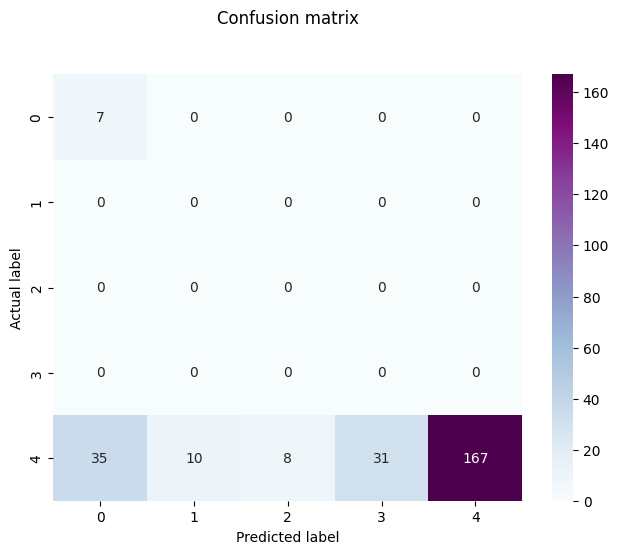

In [14]:
y_pred_bayes = pipeline_Bayes.predict(x_val)
evaluation(y_pred_bayes, y_val)

### Random Forest

              precision    recall  f1-score   support

           1       0.52      0.71      0.60        31
           2       0.00      1.00      0.00         0
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.96      0.72      0.82       223

    accuracy                           0.71       258
   macro avg       0.30      0.49      0.28       258
weighted avg       0.89      0.71      0.78       258



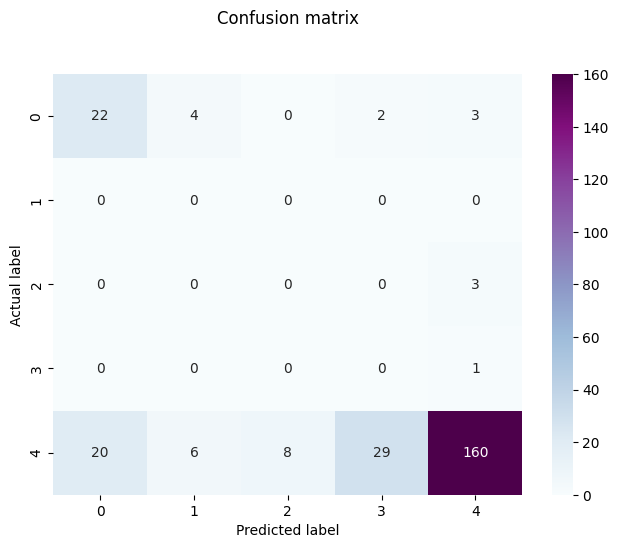

In [15]:
y_pred_rf = pipeline_Random.predict(x_val)
evaluation(y_pred_rf, y_val)

### Logictic Regression

              precision    recall  f1-score   support

           1       0.38      0.76      0.51        21
           2       0.00      1.00      0.00         0
           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       0.99      0.70      0.82       237

    accuracy                           0.71       258
   macro avg       0.27      0.89      0.27       258
weighted avg       0.94      0.71      0.80       258



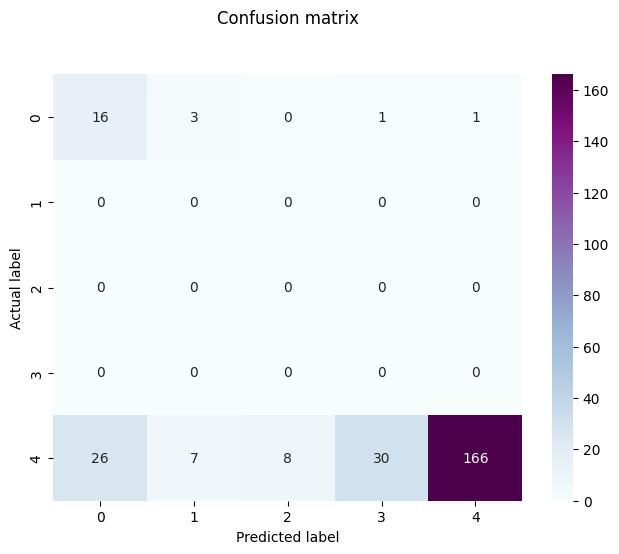

In [16]:
y_pred_lr = pipeline_Logistic.predict(x_val)
evaluation(y_pred_lr, y_val)

### Support Vector Classification (SVC)

              precision    recall  f1-score   support

           1       0.31      0.72      0.43        18
           2       0.00      1.00      0.00         0
           3       0.00      1.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.99      0.69      0.81       239

    accuracy                           0.69       258
   macro avg       0.26      0.68      0.25       258
weighted avg       0.94      0.69      0.78       258



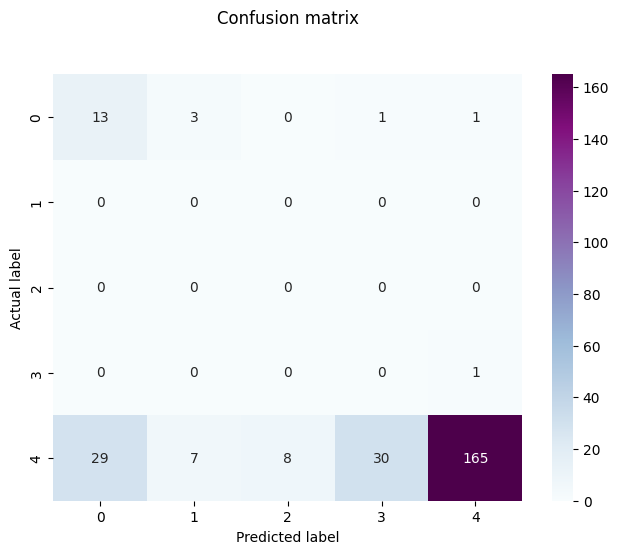

In [17]:
y_pred_svc = pipeline_SVC2.predict(x_val)
evaluation(y_pred_svc, y_val)

Looking at the three models above, the average accuracy is almost the same as SVC (70 %), Random Forest (71 %), Logistic regression (72 %), but for all three the recall value for rating 2 = 0.0

## Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Random Forest

In [19]:
# Number of trees in random forest
n_estimators = np.arange(100, 400, 100)
# Maximum number of levels in tree
max_depth = [10, 20, 30]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf' : min_samples_leaf,
              }
BestParamsforest= RandomizedSearchCV(pipeline_Random, random_grid, cv=5, n_jobs=-1, verbose=1)
BestParamsforest.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('bow', CountVectorizer()),
                                             ('tfidf', TfidfTransformer()),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': [10, 20, 30],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': array([100, 200, 300])},
                   verbose=1)

              precision    recall  f1-score   support

           1       0.31      0.76      0.44        17
           2       0.00      1.00      0.00         0
           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       0.99      0.69      0.81       241

    accuracy                           0.69       258
   macro avg       0.26      0.89      0.25       258
weighted avg       0.95      0.69      0.79       258



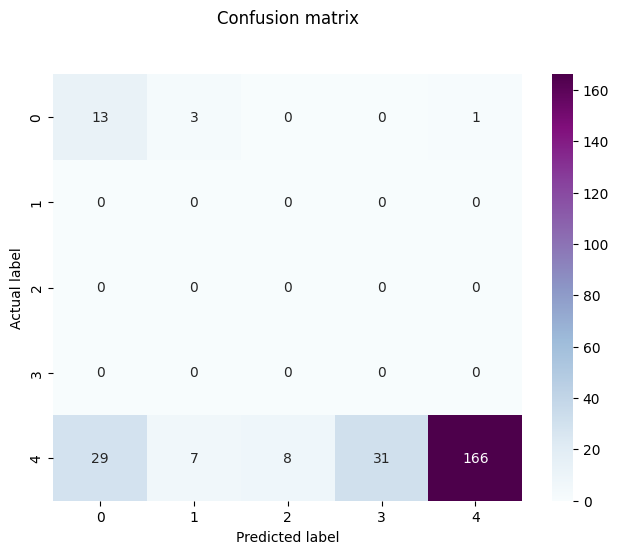

In [20]:
y_pred_rf_max = BestParamsforest.predict(x_val)
evaluation(y_pred_rf_max, y_val)

### Support Vector Classification (SVC)

In [21]:
random_grid = {'classifier__C': [0.1, 1, 10, 100, 1000],
               'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
BestParamsSVC = RandomizedSearchCV(pipeline_SVC2, random_grid, cv=5, n_jobs= -1, verbose=1)
BestParamsSVC.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                             ('tfidf', TfidfTransformer()),
                                             ('classifier', SVC())]),
                   n_jobs=-1,
                   param_distributions={'classifier__C': [0.1, 1, 10, 100,
                                                          1000],
                                        'classifier__gamma': [1, 0.1, 0.01,
                                                              0.001, 0.0001],
                                        'classifier__kernel': ['linear', 'poly',
                                                               'rbf',
                                                               'sigmoid']},
                   verbose=1)

              precision    recall  f1-score   support

           1       0.64      0.68      0.66        40
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.06      0.17      0.09        12
           5       0.91      0.77      0.83       198

    accuracy                           0.70       258
   macro avg       0.32      0.32      0.32       258
weighted avg       0.80      0.70      0.75       258



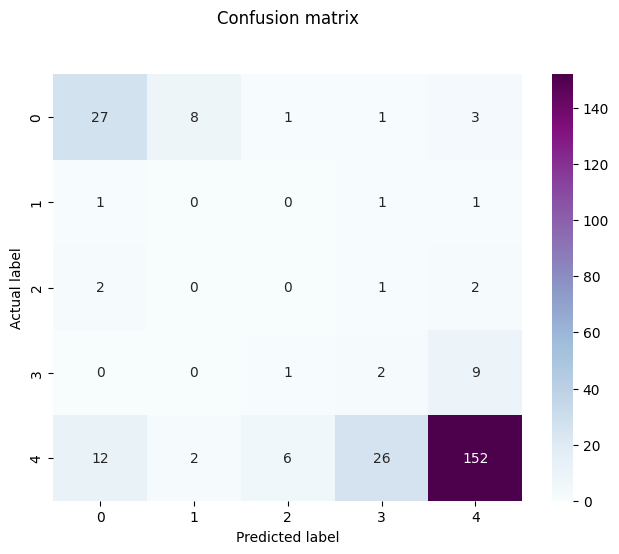

In [22]:
y_pred_svc_max = BestParamsSVC.predict(x_val)
evaluation(y_pred_svc_max, y_val)

## Final Processing

In [23]:
df_test['LABEL'] = BestParamsSVC.predict(df_test['PREPROCESS'])
df_test.head()

,ID,REVIEW,LENGTH,PREPROCESS,LENGTH_PRE,LABEL
0,0,"LOCATION: Letaknya di perempatan jalan, di dep...",752,location letak empat jalan depan gereja lama g...,523,5
1,1,"Boleh lah sesekali kesini, makanan biasa saja ...",174,lah sekal kesini biasa bilang enak cukup lumay...,116,5
2,2,Tempatnya enak biarpun tidak luas. Suasana nyaman,49,enak biarpun luas suasana nyaman,32,5
3,3,"depot bu Rudy antri, driver gojek kalau dapet ...",114,depot bu rudy antri driver gojek kalau dapet o...,95,1
4,4,saya sering banget makan di tempat ini ...tapi...,122,sering banget tapi lama lama sambal kok kurang...,81,1


In [24]:
# Create result dataframe
result_df = pd.DataFrame({'ID': df_test['ID'], 'LABEL': df_test['LABEL']})

# Menyimpan dataframe dalam csv
result_df.to_csv('result/final-svc-best.csv', index=False)

## Recurrent neural network (RNN) - LSTM

In [ ]:
## Get the checkpoint file
df = pd.read_csv('checkpoint/preprocessed.csv')
df.head()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf

tokenizer = Tokenizer(num_words=80, oov_token="unk")
tokenizer.fit_on_texts(df['PREPROCESS'].tolist())

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(df['PREPROCESS'].tolist(), df['LABEL'].tolist(), test_size=0.285714)

In [ ]:
from collections import Counter

def count_unique_and_frequencies(lst):
    # Use Counter to count frequencies
    freq_counter = Counter(lst)
    
    # Print unique numbers and their frequencies
    for num, freq in freq_counter.items():
        print(f"Number {num} has frequency {freq}")

# Example usage
count_unique_and_frequencies(y_train)

In [ ]:
count_unique_and_frequencies(y_valid)

In [ ]:
sequences = tokenizer.texts_to_sequences(df['PREPROCESS'].tolist())
max_length = max([len(seq) for seq in sequences])
max_length

# Convert texts to sequences
x_train_seq = tokenizer.texts_to_sequences(X_train)
x_valid_seq = tokenizer.texts_to_sequences(X_valid)

# Padding sequences
x_train_pad = pad_sequences(x_train_seq, padding='post', maxlen=max_length)
x_valid_pad = pad_sequences(x_valid_seq, padding='post', maxlen=max_length)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train_pad, np.asarray(tf.keras.utils.to_categorical(y_train))))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid_pad, np.asarray(tf.keras.utils.to_categorical(y_valid))))

In [ ]:
from tensorflow.keras import regularizers
embedding_dim = 64
vocab_size = len(tokenizer.word_index) + 1

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, embeddings_regularizer=regularizers.l2(0.0005)))                                     
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=32, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])


In [ ]:
epochs = 30
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(100).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

In [ ]:
# Get the test checpoint
df_test = pd.read_csv('checkpoint/test-preprocessed.csv')
df_test.head()

In [ ]:
# Convert texts to sequences
x_test_seq = tokenizer.texts_to_sequences(df_test['PREPROCESS'].tolist())

# Padding sequences
x_test_pad = pad_sequences(x_test_seq, padding='post', maxlen=max_length)

In [ ]:
predictions = model.predict(x_test_pad)
predictions_res = predictions.argmax(axis=1)
print(predictions_res)

In [ ]:
predictions_results = pd.DataFrame(df_test['REVIEW'], columns=['REVIEW'])
predictions_results2 = pd.DataFrame(predictions_res, columns=['LABEL'])

predictions_results = pd.concat([predictions_results, predictions_results2], axis=1)
predictions_results

In [ ]:
# Menyimpan dataframe dalam csv
predictions_results.to_csv('result/final-lstm.csv', index=False)